In [15]:
"""

Code to compute spike-triggered average.
"""

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for num_timesteps timesteps before spike"""
    
    sta = np.zeros(num_timesteps)
    
    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps   #Indices of all spikes after 300ms

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = len(spike_times)
    
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    # 
    # Your code goes here.
    k = np.array([])
    for i in range(0,num_spikes):
        k = stim[int(spike_times[i])-num_timesteps+1:int(spike_times[i])+1]
        sta = k + sta
    sta = sta/num_spikes    
    return sta

In [13]:
import pickle
FILENAME = 'c1p8.pickle'

with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']


In [61]:
spike_times = rho[300:].nonzero()[0] + 300

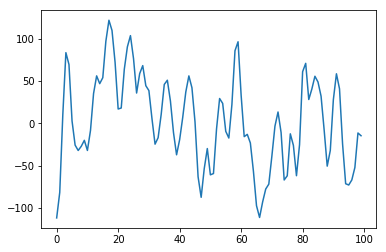

In [34]:
plt.plot(time[:100],stim[:100])

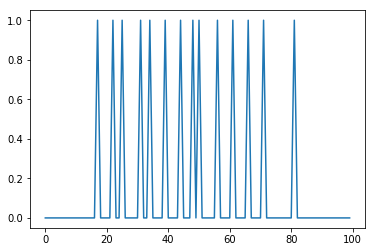

In [33]:
plt.plot(time[:100],rho[:100])

In [68]:
sta = compute_sta(stim,rho, 300)

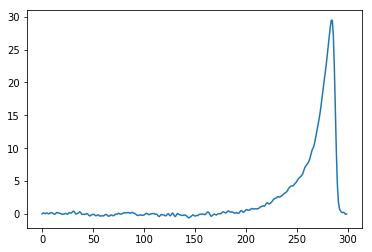

In [69]:
plt.plot(time[:300],sta)